In [23]:
import pandas as pd
pd.options.display.max_columns = 100

In [24]:
muts_df = pd.read_pickle("./data/SER_df.pkl")
len(muts_df)

27

### Genomic features can get counts from the "genomic feature" column since no lower-level features that link to genomic features exist. This isn't the case with the other feature tyles.

In [25]:
cond_cnt_d = {"none": 0}
feat_cnt = 0
for _, mut in muts_df.iterrows():
    for feat in mut["genomic features"]:
        feat_cnt += 1
        if len(feat["significantly associated conditions"]) > 0:
            for cond in feat["significantly associated conditions"]:
                if cond in cond_cnt_d.keys():
                    cond_cnt_d[cond] += 1
                else:
                    cond_cnt_d[cond] = 1
        else:
            cond_cnt_d["none"] += 1
            
cond_cnt_d

{'none': 5,
 'ΔsdaA ΔsdaB ΔtdcG ΔglyA': 23,
 "glycine(2mM)  L-Serine(varying concentration)  trace elements(X1)  Wolfe's vitamin solution.": 23}

,condition,mutated feature count,proportion
0,none,5.0,0.178571
1,ΔsdaA ΔsdaB ΔtdcG ΔglyA,23.0,0.821429
2,glycine(2mM) L-Serine(varying concentration) ...,23.0,0.821429


Text(0.5, 0, 'mutated feature count')

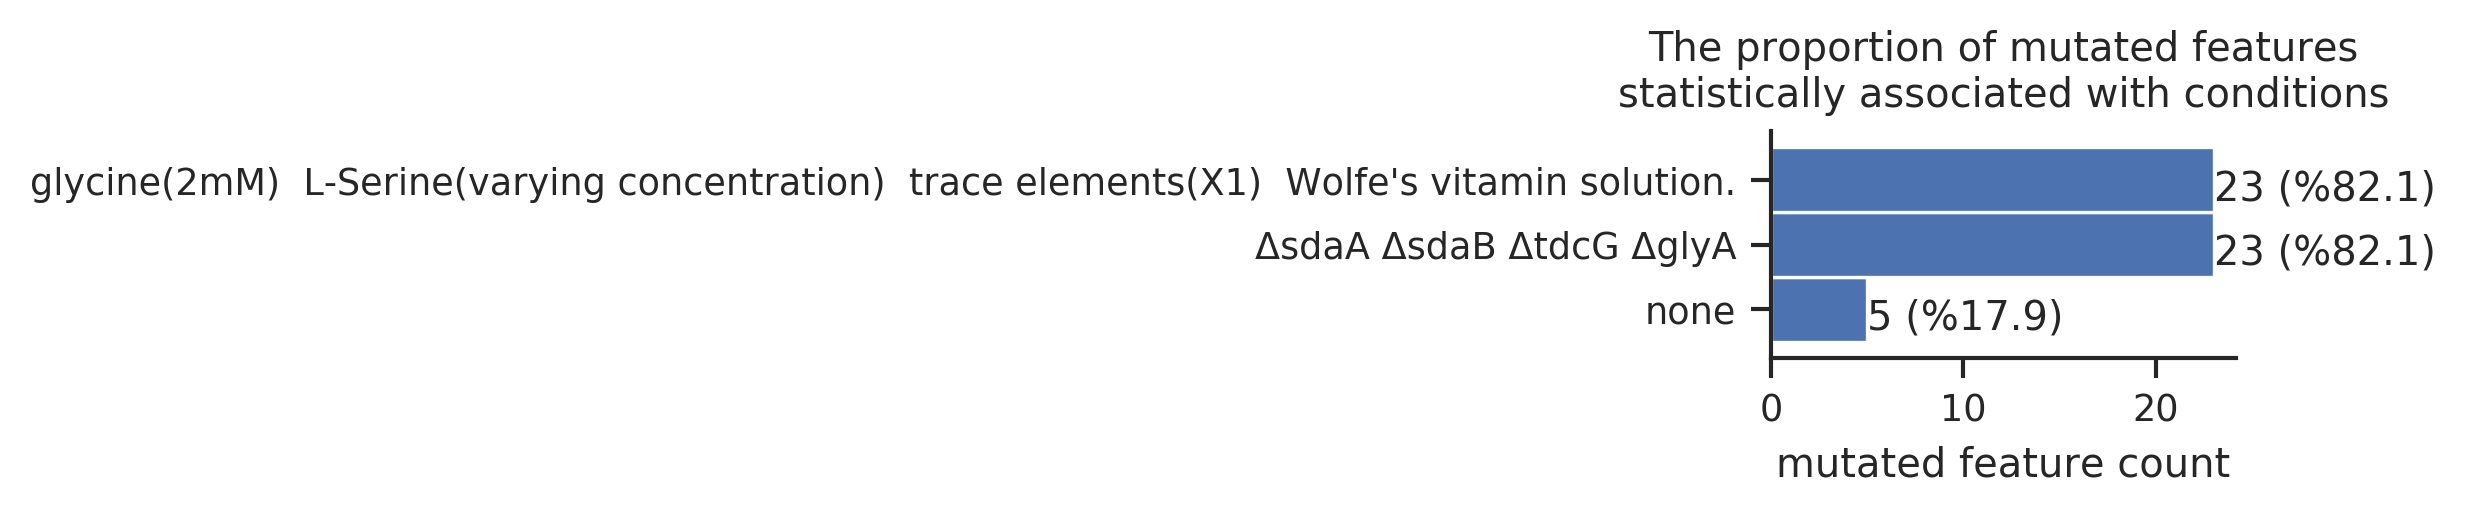

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")

cond_cnt_df = pd.DataFrame()
for key, val in cond_cnt_d.items():
    cond_cnt_df = cond_cnt_df.append({"condition": key, "mutated feature count": val, "proportion":val/feat_cnt}, ignore_index=True)
display(cond_cnt_df)

cond_cnt_df = cond_cnt_df.sort_values(by="mutated feature count", ascending=True)

ax = cond_cnt_df.plot.barh(
    y="mutated feature count",
    x="condition",
    color="#4C72B0",
    figsize=(2,1),
    width=1
)

cond_cnt_df = cond_cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cond_cnt_df.iterrows(): 
    s = str(int(r["mutated feature count"])) +' (%{0:.1f})'.format(r["proportion"] * 100)
    ax.text(r["mutated feature count"], i-0.3,  s)
sns.despine(ax=ax, top=True, right=True)
ax.set_title("The proportion of mutated features\nstatistically associated with conditions")
ax.get_legend().remove()
sns.despine(ax=ax, top=True, right=True)
ax.set_ylabel('')
ax.set_xlabel("mutated feature count")

In [27]:
import pickle
f = open("./data/signif_genomic_feat_cond_json.pkl", 'rb')   
signif_genomic_feat_cond_json = pickle.load(f)
signif_genomic_feat_cond_json[0:5]

[{'mutated features': 'ackA',
  'condition': 'Δpgi',
  'odd ratio': 19.76830318690784,
  'p value': 0.005611374257331419},
 {'mutated features': 'actP',
  'condition': 'D-lyxose',
  'odd ratio': 91.47619047619048,
  'p value': 0.0002902952921727443},
 {'mutated features': 'aldA TFBS',
  'condition': 'D-2-deoxyribose',
  'odd ratio': 11.347999005717126,
  'p value': 1.3022780635838894e-06},
 {'mutated features': 'araA',
  'condition': 'Δpts',
  'odd ratio': 101.02921840759679,
  'p value': 5.816691914618809e-06},
 {'mutated features': 'araC',
  'condition': 'D-arabinose',
  'odd ratio': 122.005291005291,
  'p value': 0.0001667390157604181}]

In [28]:
def get_signif_mut_conds(feat_name):
    signif_mut_conds = []
    for signif_mut_cond in signif_genomic_feat_cond_json:
        if signif_mut_cond['mutated features'] == feat_name:
            signif_mut_conds.append(signif_mut_cond)
    return signif_mut_conds
    
    

cond_mut_feat_assoc_df = pd.DataFrame()
for _, mut in muts_df.iterrows():
    for feat in mut["genomic features"]:
        signif_mut_conds = get_signif_mut_conds(feat["name"])
        for d in signif_mut_conds:
            cond_mut_feat_assoc_df = cond_mut_feat_assoc_df.append(d, ignore_index=True)

cond_mut_feat_assoc_df.head()

,condition,mutated features,odd ratio,p value
0,glycine(2mM) L-Serine(varying concentration) ...,thrA,149.562162,0.000002
1,ΔsdaA ΔsdaB ΔtdcG ΔglyA,thrA,149.562162,0.000002
2,isobutyric acid,pykF,5.382947,0.000080
3,glycine(2mM) L-Serine(varying concentration) ...,aroP,189.888889,0.006047
4,ΔsdaA ΔsdaB ΔtdcG ΔglyA,aroP,189.888889,0.006047


In [29]:
ser_cond_mut_feat_assoc_df = cond_mut_feat_assoc_df[cond_mut_feat_assoc_df["condition"].isin(cond_cnt_d.keys())].copy()
# ser_cond_mut_feat_assoc_df["mutated features"] = ser_cond_mut_feat_assoc_df["mutated features"].apply(lambda f: f.replace("attenuator terminator", "att term"))
# ser_cond_mut_feat_assoc_df["mutated features"] = ser_cond_mut_feat_assoc_df["mutated features"].apply(lambda f: f.replace("terminator", "term"))

cross_counts_df = pd.crosstab(
    ser_cond_mut_feat_assoc_df["mutated features"],
    ser_cond_mut_feat_assoc_df["condition"]
)

cross_counts_df

condition,glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,ΔsdaA ΔsdaB ΔtdcG ΔglyA
mutated features,,
argP,1,1
aroP,1,1
cycA,1,1
eno,1,1
frc,1,1
gcvAp,1,1
gcvB,1,1
gcvB gcvA TFBS,1,1
gcvRp,2,2


In [30]:
bin_df = cross_counts_df.copy()
for ir, r in bin_df.iterrows():
    for ic, c in r.items():
        if bin_df.loc[ir, ic] > 0:
            bin_df.loc[ir, ic] = 1
display(bin_df)

condition,glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,ΔsdaA ΔsdaB ΔtdcG ΔglyA
mutated features,,
argP,1,1
aroP,1,1
cycA,1,1
eno,1,1
frc,1,1
gcvAp,1,1
gcvB,1,1
gcvB gcvA TFBS,1,1
gcvRp,1,1


In [31]:
# only want to plot genomic targets that have significant convergences
# I only want to look at mutated targets that have significant convergence
signif_gen_targ_s = set()
for _, r in muts_df.iterrows():
    for f in r["genomic features"]:
        if f["significantly enriched"]:
            signif_gen_targ_s.add(f["name"])
signif_gen_targ_s

{'gcvRp', 'thrA'}

In [32]:
odds_df = bin_df.copy()
for feat, r in bin_df.iterrows():
    for cond, c in r.items():
        if bin_df.loc[feat, cond] > 0:
            odd_ratio = 0
            df = cond_mut_feat_assoc_df[
                (cond_mut_feat_assoc_df["condition"]==cond)
                & (cond_mut_feat_assoc_df["mutated features"]==feat)]["odd ratio"]
            if len(df):
                odd_ratio = df.unique()
            odds_df.loc[feat, cond] = odd_ratio
            
odds_df = odds_df[odds_df.index.isin(signif_gen_targ_s)]
# odds_df.index = '*'+odds_df.index
odds_df

condition,glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,ΔsdaA ΔsdaB ΔtdcG ΔglyA
mutated features,,
gcvRp,197.153846,197.153846
thrA,149.562162,149.562162


In [35]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from util.metadata_categories_for_associations import METADATA_CATEGORIES_FOR_ASSOCIATIONS

exp_conds_df = muts_df[METADATA_CATEGORIES_FOR_ASSOCIATIONS].drop_duplicates()
exp_conds_df

,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
1025,37 celsius,glucose(2),glycine(2mM) L-Serine(varying concentration) ...,ΔsdaA ΔsdaB ΔtdcG ΔglyA,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)


In [36]:
for i in exp_conds_df.columns:
    c = exp_conds_df.at[exp_conds_df.index[0], i]
    if c not in odds_df.columns:
        odds_df[c] = 0

odds_df

condition,glycine(2mM) L-Serine(varying concentration) trace elements(X1) Wolfe's vitamin solution.,ΔsdaA ΔsdaB ΔtdcG ΔglyA,37 celsius,glucose(2),511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
mutated features,,,,,,,,,,
gcvRp,197.153846,197.153846,0,0,0,0,0,0,0,0
thrA,149.562162,149.562162,0,0,0,0,0,0,0,0


In [37]:
odds_df.to_pickle("./data/SER_key_geno_feat_assoc_odds.pkl")